In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
cube = pd.read_csv('Final_Data')

In [3]:
cube

,Country,Year,Category,Normed_Deaths
0,1300,2005,1.0,0.000120
1,1300,2005,2.0,0.000739
2,1300,2005,3.0,0.000013
3,1300,2005,4.0,0.001494
4,1300,2005,5.0,0.000045
...,...,...,...,...
14294,5198,2018,16.0,0.000131
14295,5198,2018,17.0,0.000030
14296,5198,2018,18.0,0.000008
14297,5198,2018,20.0,0.000021


In [4]:
## the next two cells give us the count of countries in each year for our data set
country_count = cube.groupby(['Year','Country']).sum().reset_index()

In [5]:
country_count['Year'].value_counts()

2011    45
2015    43
2012    43
2014    42
2013    42
2009    42
2007    41
2010    41
2008    40
2016    39
2005    35
2002    35
2006    35
2004    34
2003    33
2001    32
2017    27
2000    27
1999    21
1998    15
1997    12
1996    11
1995     8
2018     8
1994     2
Name: Year, dtype: int64

In [6]:
## going to pivot the data out for both 2005 and 2015 year and then do EDA 
##here is 2015 data
cube_15 = cube[cube.Year == 2015].copy()
cube_15 = cube_15.pivot(index = 'Country',columns = 'Category',values = 'Normed_Deaths').reset_index()
cube_15 = cube_15.fillna(0)
cube_15

Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
0,1300,0.000174,0.001040,0.000035,0.001922,5.898434e-05,0.000131,0.000000e+00,0.000000e+00,0.002608,...,0.000267,3.194985e-05,0.000025,0.000114,3.276908e-06,0.000084,0.000031,0.000126,0.000413,0.007779
1,1365,0.000072,0.000858,0.000095,0.001240,7.152735e-05,0.000072,0.000000e+00,0.000000e+00,0.002122,...,0.000381,7.152735e-05,0.000000,0.000024,4.768490e-05,0.000119,0.000048,0.000143,0.000238,0.005984
2,3080,0.000173,0.001649,0.000031,0.000535,1.779113e-04,0.000279,0.000000e+00,0.000000e+00,0.002471,...,0.000230,2.490758e-05,0.000033,0.000257,0.000000e+00,0.000021,0.000018,0.000212,0.000338,0.007102
3,3090,0.000176,0.002013,0.000009,0.000085,1.588194e-04,0.000056,2.742995e-07,1.371498e-07,0.001386,...,0.000216,2.413836e-05,0.000022,0.000311,1.371498e-07,0.000005,0.000009,0.000211,0.000273,0.006413
4,3150,0.000303,0.001365,0.000029,0.000403,1.880635e-04,0.000193,4.773185e-07,1.193296e-07,0.001241,...,0.000177,5.405632e-05,0.000044,0.000262,8.353073e-07,0.000030,0.000034,0.000307,0.000213,0.005282
5,3160,0.000201,0.003054,0.000026,0.000167,1.052511e-04,0.000247,3.989808e-08,1.037350e-07,0.002706,...,0.000386,1.315041e-05,0.000049,0.000296,3.511031e-07,0.000004,0.000016,0.000822,0.000542,0.010297
6,3170,0.000081,0.000483,0.000013,0.000236,4.559228e-07,0.000056,0.000000e+00,1.519743e-07,0.001143,...,0.000101,5.926997e-06,0.000007,0.000108,5.775022e-06,0.000123,0.000106,0.000036,0.000237,0.002916
7,3190,0.000103,0.000224,0.000003,0.000040,1.485353e-05,0.000014,0.000000e+00,0.000000e+00,0.000607,...,0.000044,9.902350e-07,0.000003,0.000028,1.237794e-06,0.000057,0.000053,0.000036,0.000227,0.001604
8,3255,0.000165,0.000266,0.000029,0.000188,1.732217e-05,0.000064,0.000000e+00,0.000000e+00,0.001348,...,0.000064,2.020919e-05,0.000009,0.000098,5.774055e-06,0.000110,0.000032,0.000370,0.000139,0.003363
9,3350,0.000046,0.001458,0.000001,0.000067,2.562335e-07,0.000049,0.000000e+00,1.024934e-06,0.001453,...,0.000114,2.716075e-05,0.000022,0.000229,7.687006e-07,0.000006,0.000013,0.000016,0.000171,0.004776


In [8]:
cube_15.describe()

Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
count,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01,43.000000,4.300000e+01,4.300000e+01,43.000000,...,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3887.697674,0.000148,0.002166,0.000023,0.000319,2.835021e-04,0.000275,2.511223e-07,2.988864e-07,0.003598,...,0.000370,1.882775e-05,0.000036,0.000180,2.483188e-06,0.000041,0.000030,0.000339,0.000440,0.009057
std,742.048020,0.000071,0.000839,0.000017,0.000320,2.572837e-04,0.000155,7.014501e-07,3.322869e-07,0.002262,...,0.000194,1.441457e-05,0.000023,0.000081,7.393069e-06,0.000061,0.000017,0.000553,0.000186,0.003287
min,1300.000000,0.000046,0.000224,0.000001,0.000040,2.562335e-07,0.000014,0.000000e+00,0.000000e+00,0.000607,...,0.000044,9.902350e-07,0.000000,0.000024,0.000000e+00,0.000004,0.000009,0.000016,0.000139,0.001604
25%,3705.000000,0.000094,0.001715,0.000013,0.000159,5.466185e-05,0.000155,0.000000e+00,2.522743e-08,0.002081,...,0.000235,7.731680e-06,0.000018,0.000125,2.506749e-07,0.000016,0.000020,0.000102,0.000331,0.006709
50%,4170.000000,0.000139,0.002420,0.000020,0.000246,2.063314e-04,0.000274,0.000000e+00,1.519743e-07,0.002706,...,0.000383,1.697818e-05,0.000037,0.000171,5.079738e-07,0.000022,0.000026,0.000205,0.000427,0.009197
75%,4250.000000,0.000185,0.002776,0.000031,0.000400,4.317259e-04,0.000364,2.337008e-07,5.170024e-07,0.004557,...,0.000442,2.541333e-05,0.000052,0.000241,1.271648e-06,0.000031,0.000034,0.000353,0.000522,0.010972
max,5150.000000,0.000364,0.003400,0.000095,0.001922,8.346835e-04,0.000600,4.294984e-06,1.117542e-06,0.010034,...,0.001060,7.152735e-05,0.000089,0.000339,4.768490e-05,0.000373,0.000106,0.003574,0.001104,0.015341


In [9]:
cube_15.corr()


Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
Category,,,,,,,,,,,,,,,,,,,,,
Country,1.000000,-0.021675,0.541501,-0.377349,-0.665687,0.440770,0.509206,0.100093,0.250402,0.288612,...,0.305610,-0.389724,0.430484,0.134377,-0.552648,-0.235445,-0.216276,0.060344,0.359235,0.391411
1.0,-0.021675,1.000000,0.185313,0.212364,0.029767,0.062535,0.219778,0.123430,-0.110904,-0.002793,...,0.044094,0.027495,0.202318,0.432846,-0.183986,-0.124345,-0.307962,0.141418,0.191364,0.152414
2.0,0.541501,0.185313,1.000000,-0.073398,-0.158169,0.471821,0.575729,0.025818,0.401817,0.537907,...,0.551429,-0.127023,0.508810,0.498102,-0.390477,-0.607377,-0.601414,0.068978,0.550210,0.810849
3.0,-0.377349,0.212364,-0.073398,1.000000,0.548032,0.095682,0.175839,0.391535,-0.142604,-0.133660,...,-0.050706,0.494665,0.110507,-0.005103,0.600586,0.035294,-0.071377,0.403891,-0.186202,0.024162
4.0,-0.665687,0.029767,-0.158169,0.548032,1.000000,-0.146437,-0.109938,-0.036437,-0.217454,-0.034796,...,-0.061345,0.437467,-0.126944,-0.080833,0.428008,0.081079,0.001346,-0.024276,-0.098568,-0.006986
5.0,0.440770,0.062535,0.471821,0.095682,-0.146437,1.000000,0.870055,0.053579,0.362341,-0.242369,...,0.076719,0.224798,0.865470,0.166403,-0.252351,-0.358288,-0.231831,-0.143754,0.019762,0.099145
6.0,0.509206,0.219778,0.575729,0.175839,-0.109938,0.870055,1.000000,0.081885,0.221498,-0.105942,...,0.145539,0.112253,0.865317,0.343588,-0.339117,-0.407479,-0.317663,-0.050197,0.113139,0.253054
7.0,0.100093,0.123430,0.025818,0.391535,-0.036437,0.053579,0.081885,1.000000,0.255963,0.047362,...,-0.014280,0.001452,0.057184,-0.019882,-0.004452,0.045048,0.017772,0.831865,-0.019265,0.182741
8.0,0.250402,-0.110904,0.401817,-0.142604,-0.217454,0.362341,0.221498,0.255963,1.000000,0.209241,...,0.412199,-0.088753,0.295111,0.047902,-0.163171,-0.219812,-0.100597,0.033486,0.263590,0.333362


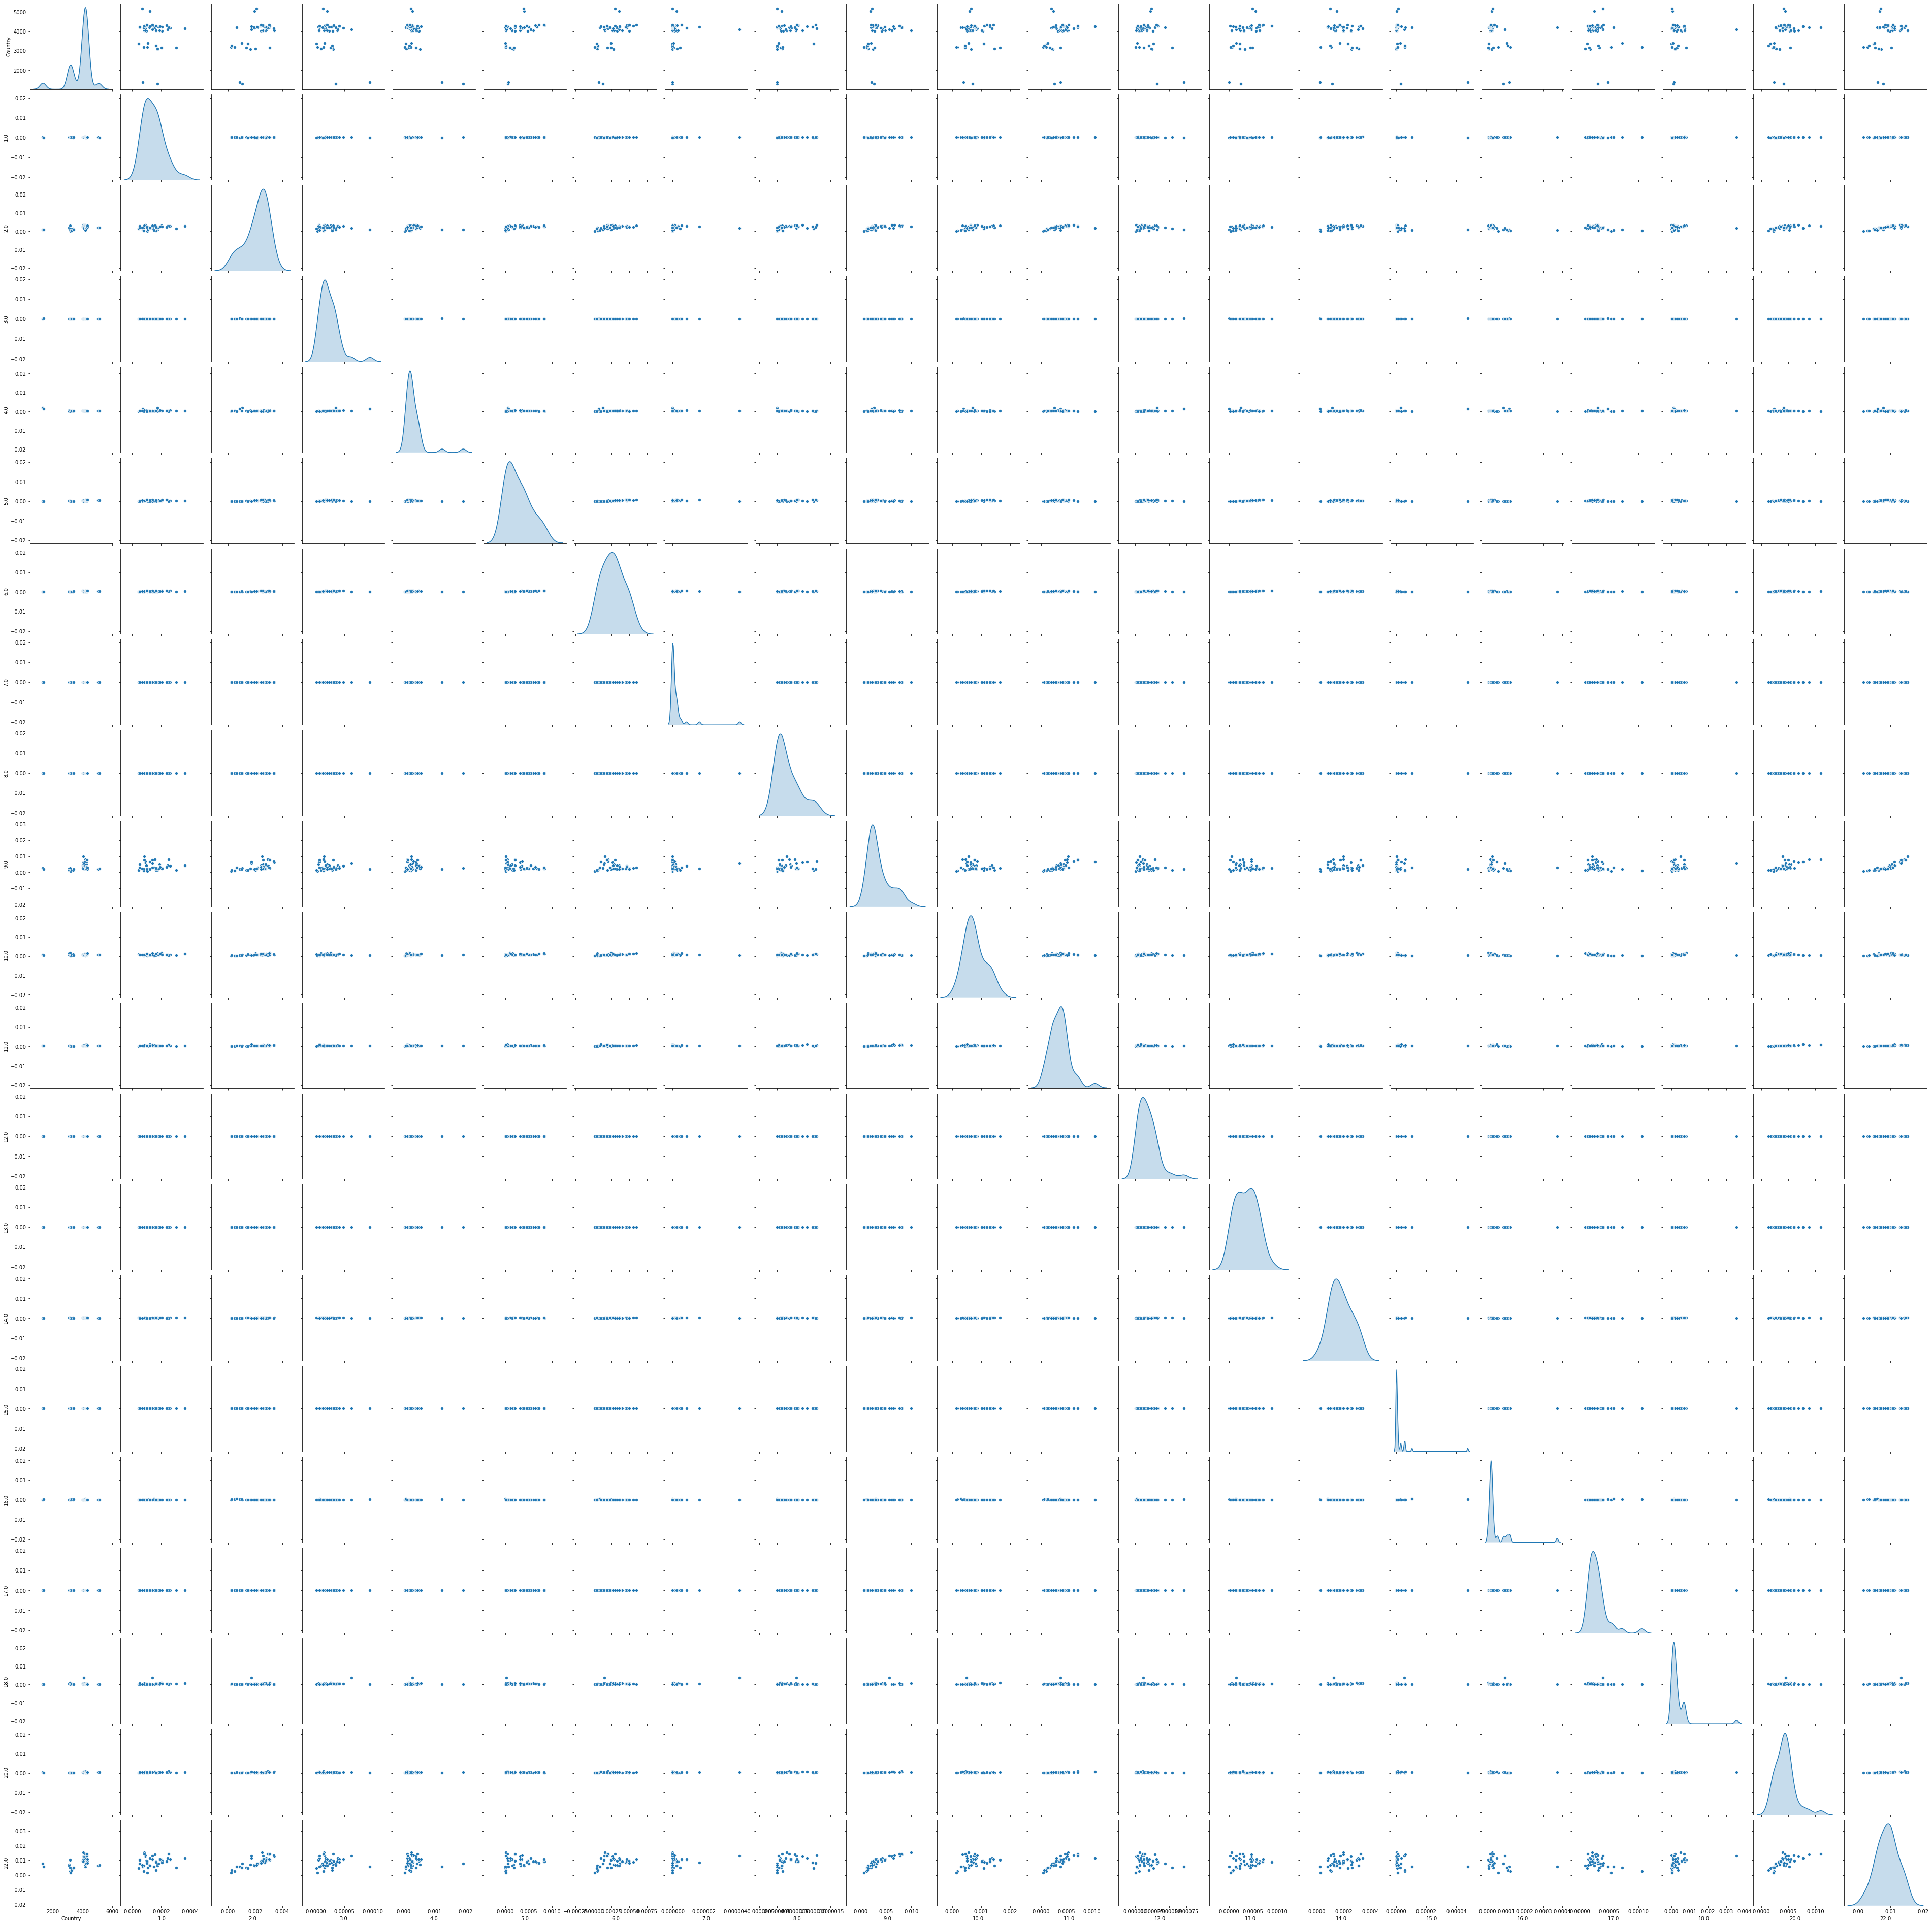

In [59]:
## pairplot of data
sb.pairplot(cube_15, diag_kind='kde');


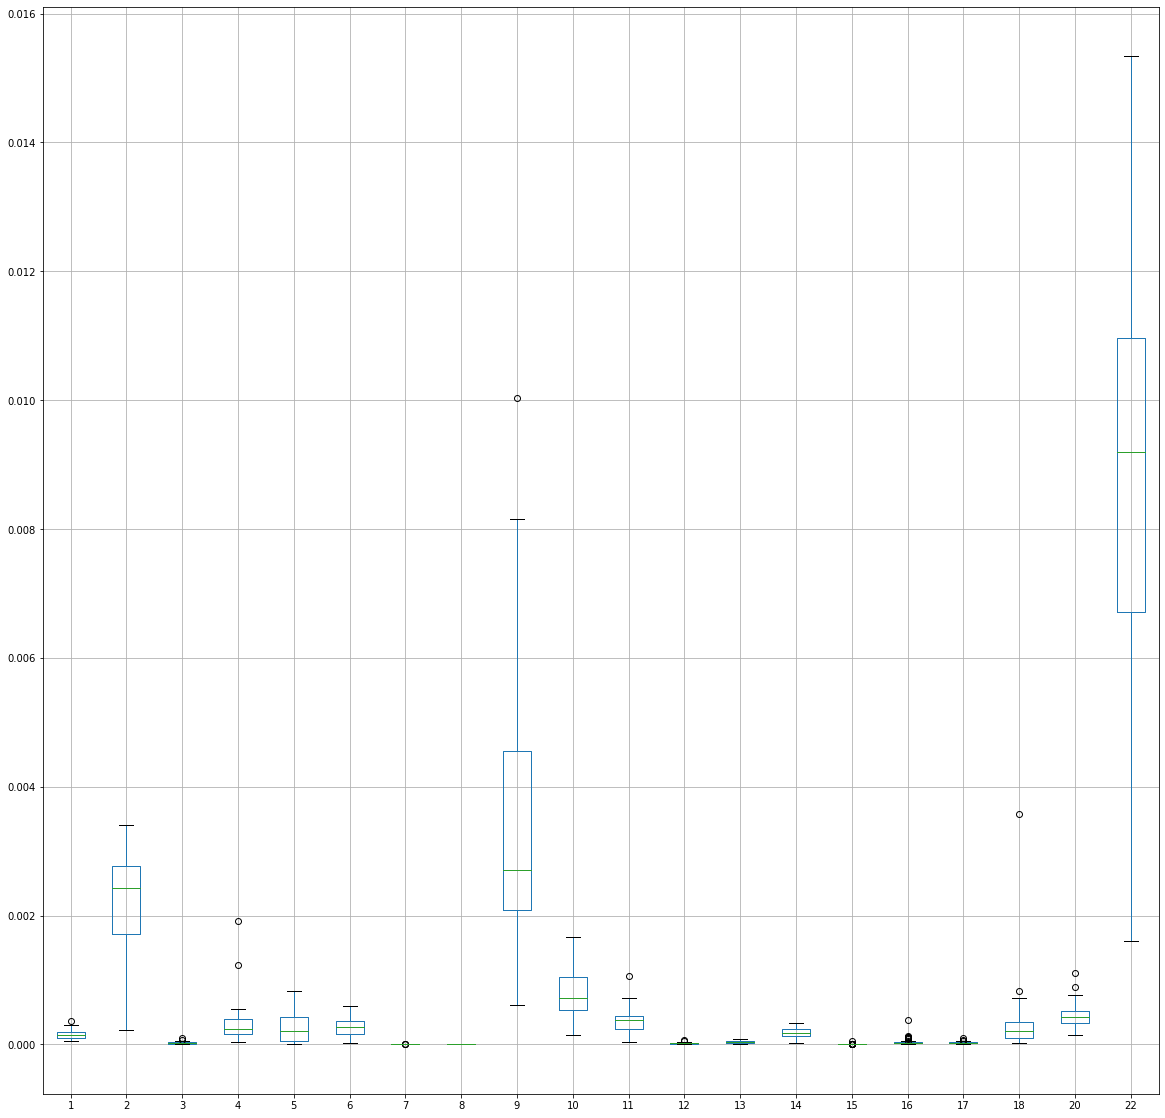

In [94]:
##making basic boxplots out of the data for 2015
cube_15.boxplot(column =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22],figsize = (20,20))

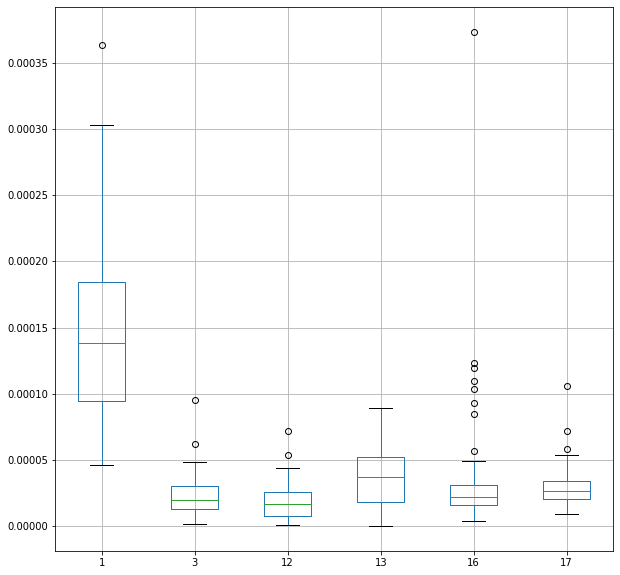

In [100]:
##1,3,12,13,16,17
cube_15.boxplot(column =[1,3,12,13,16,17],figsize = (10,10))

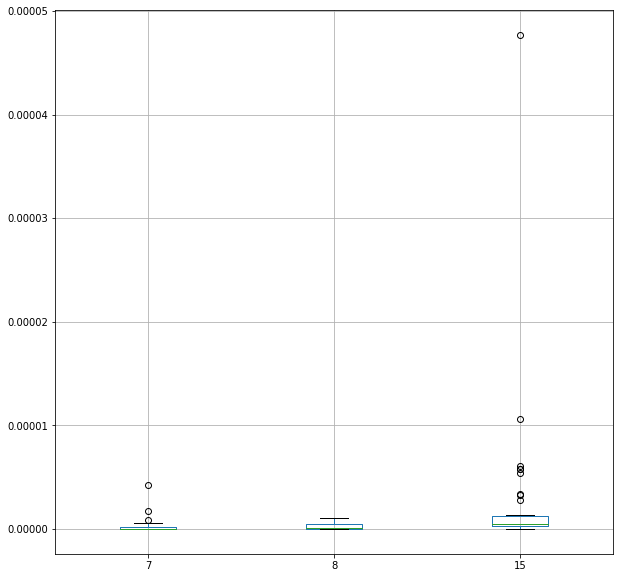

In [99]:
##7,8,15
cube_15.boxplot(column =[7,8,15],figsize = (10,10))

In [111]:
##here is 2005
cube_05 = cube[cube.Year == 2005].copy()
cube_05 = cube_05.pivot(index = 'Country',columns = 'Category',values = 'Normed_Deaths').reset_index()
cube_05 = cube_05.fillna(0)
cube_05

Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
0,1300,0.000120,0.000739,0.000013,0.001494,0.000045,0.000094,0.000000e+00,0.000000e+00,0.002606,...,0.000322,8.289496e-06,1.492109e-05,0.000164,3.315798e-06,0.000106,0.000066,0.000153,0.000415,0.006981
1,1365,0.000108,0.000650,0.000000,0.001138,0.000054,0.000108,0.000000e+00,0.000000e+00,0.002547,...,0.000135,2.709513e-05,0.000000e+00,0.000054,0.000000e+00,0.000027,0.000190,0.000217,0.000406,0.006069
2,2090,0.000129,0.002132,0.000025,0.000318,0.000240,0.000334,1.238409e-07,1.857614e-07,0.002221,...,0.000277,9.814395e-06,4.894813e-05,0.000161,9.288071e-07,0.000032,0.000028,0.000076,0.000456,0.007125
3,2450,0.000224,0.001937,0.000029,0.000348,0.000241,0.000407,1.518165e-07,1.956746e-07,0.002904,...,0.000295,1.428425e-05,4.864202e-05,0.000212,2.564013e-06,0.000049,0.000035,0.000108,0.000595,0.008259
4,3080,0.000073,0.001364,0.000040,0.000521,0.000055,0.000140,0.000000e+00,0.000000e+00,0.002861,...,0.000234,3.903957e-05,3.096242e-05,0.000188,0.000000e+00,0.000035,0.000015,0.000665,0.000552,0.007303
5,3090,0.000156,0.001850,0.000009,0.000103,0.000043,0.000044,1.467739e-07,0.000000e+00,0.001488,...,0.000209,3.874831e-05,1.893383e-05,0.000264,2.935478e-07,0.000008,0.000013,0.000078,0.000316,0.005678
6,3150,0.000180,0.001422,0.000028,0.000425,0.000065,0.000161,2.885950e-07,1.442975e-07,0.001605,...,0.000187,6.507817e-05,3.102396e-05,0.000324,5.771900e-07,0.000039,0.000040,0.000307,0.000304,0.005613
7,3160,0.000187,0.002673,0.000022,0.000156,0.000036,0.000103,4.754173e-08,8.715985e-08,0.002611,...,0.000331,7.677990e-06,3.647243e-05,0.000214,5.229591e-07,0.000007,0.000018,0.000273,0.000597,0.008588
8,4010,0.000077,0.002392,0.000016,0.000551,0.000084,0.000232,1.215764e-07,2.431529e-07,0.003968,...,0.000408,5.957245e-06,3.720239e-05,0.000126,3.647293e-07,0.000024,0.000028,0.000083,0.000540,0.009141
9,4020,0.000244,0.002600,0.000029,0.000259,0.000298,0.000354,9.543244e-08,3.817298e-07,0.003302,...,0.000439,3.511914e-05,3.969990e-05,0.000161,3.817298e-07,0.000022,0.000021,0.000243,0.000616,0.009823


In [113]:
cube_05.describe()

Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000,...,35.000000,3.500000e+01,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3816.200000,0.000124,0.002166,0.000020,0.000310,0.000189,0.000232,1.652494e-07,2.230661e-07,0.003665,...,0.000386,2.007909e-05,0.000039,0.000155,1.129597e-06,0.000045,0.000035,0.000232,0.000513,0.008897
std,851.513421,0.000058,0.000668,0.000010,0.000282,0.000148,0.000110,2.629087e-07,2.059331e-07,0.001529,...,0.000154,2.279462e-05,0.000023,0.000058,2.186225e-06,0.000069,0.000031,0.000187,0.000240,0.001963
min,1300.000000,0.000036,0.000608,0.000000,0.000076,0.000006,0.000044,0.000000e+00,0.000000e+00,0.001488,...,0.000135,2.292842e-07,0.000000,0.000054,0.000000e+00,0.000007,0.000007,0.000014,0.000284,0.005613
25%,4015.000000,0.000075,0.001893,0.000014,0.000146,0.000051,0.000137,0.000000e+00,0.000000e+00,0.002633,...,0.000286,7.519374e-06,0.000022,0.000109,3.165443e-07,0.000021,0.000022,0.000081,0.000395,0.007393
50%,4160.000000,0.000120,0.002341,0.000018,0.000259,0.000172,0.000232,6.127447e-08,1.857614e-07,0.003257,...,0.000339,1.378783e-05,0.000037,0.000161,5.771900e-07,0.000031,0.000031,0.000198,0.000456,0.008901
75%,4250.000000,0.000159,0.002608,0.000028,0.000345,0.000284,0.000313,2.030667e-07,3.973781e-07,0.004122,...,0.000471,2.630155e-05,0.000055,0.000189,9.545993e-07,0.000034,0.000035,0.000314,0.000600,0.009945
max,5150.000000,0.000244,0.003181,0.000041,0.001494,0.000518,0.000460,1.210147e-06,6.019513e-07,0.007538,...,0.000843,1.237995e-04,0.000083,0.000324,1.290133e-05,0.000388,0.000190,0.000733,0.001670,0.013456


In [114]:
cube_05.corr()


Category,Country,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0
Category,,,,,,,,,,,,,,,,,,,,,
Country,1.000000,-0.179623,0.518451,0.099190,-0.730353,0.306351,0.246553,0.245954,0.373843,0.345180,...,0.377290,-0.040880,0.341641,-0.175637,-0.019883,-0.013642,-0.487858,0.022134,0.094871,0.432544
1.0,-0.179623,1.000000,-0.059710,0.278781,-0.074529,0.145166,0.159728,-0.021236,-0.007928,-0.264999,...,-0.019917,-0.028775,0.140256,0.383834,0.365031,0.168587,0.020408,0.058232,0.124595,-0.097588
2.0,0.518451,-0.059710,1.000000,0.274569,-0.434560,0.451091,0.343912,0.229126,0.589180,0.301263,...,0.598792,-0.114557,0.478014,0.139577,-0.492903,-0.584025,-0.516700,-0.153720,0.204394,0.673523
3.0,0.099190,0.278781,0.274569,1.000000,-0.028563,0.500497,0.531726,0.217539,0.106322,-0.353517,...,-0.119361,0.192491,0.531260,0.279891,-0.200291,-0.222795,-0.434200,0.373208,-0.214094,-0.085940
4.0,-0.730353,-0.074529,-0.434560,-0.028563,1.000000,-0.166321,-0.190502,-0.105049,-0.227150,-0.230645,...,-0.230618,0.069762,-0.199360,-0.065048,-0.051817,-0.032320,0.567854,-0.017104,-0.144095,-0.283294
5.0,0.306351,0.145166,0.451091,0.500497,-0.166321,1.000000,0.674236,0.536448,0.410459,-0.260257,...,0.055906,0.091451,0.746792,0.079066,-0.236203,-0.305726,-0.166909,0.022410,-0.245180,0.092544
6.0,0.246553,0.159728,0.343912,0.531726,-0.190502,0.674236,1.000000,0.350226,0.262096,-0.341152,...,-0.095168,0.035445,0.649218,-0.031327,-0.212967,-0.328554,-0.262163,-0.101591,-0.167643,-0.074879
7.0,0.245954,-0.021236,0.229126,0.217539,-0.105049,0.536448,0.350226,1.000000,0.397313,-0.198907,...,-0.049228,0.025497,0.554607,0.033893,-0.131793,-0.176568,-0.091285,-0.045757,-0.193360,-0.032263
8.0,0.373843,-0.007928,0.589180,0.106322,-0.227150,0.410459,0.262096,0.397313,1.000000,0.177442,...,0.373473,-0.076248,0.565793,0.128204,-0.207358,-0.251140,-0.101822,-0.161251,0.263538,0.464376


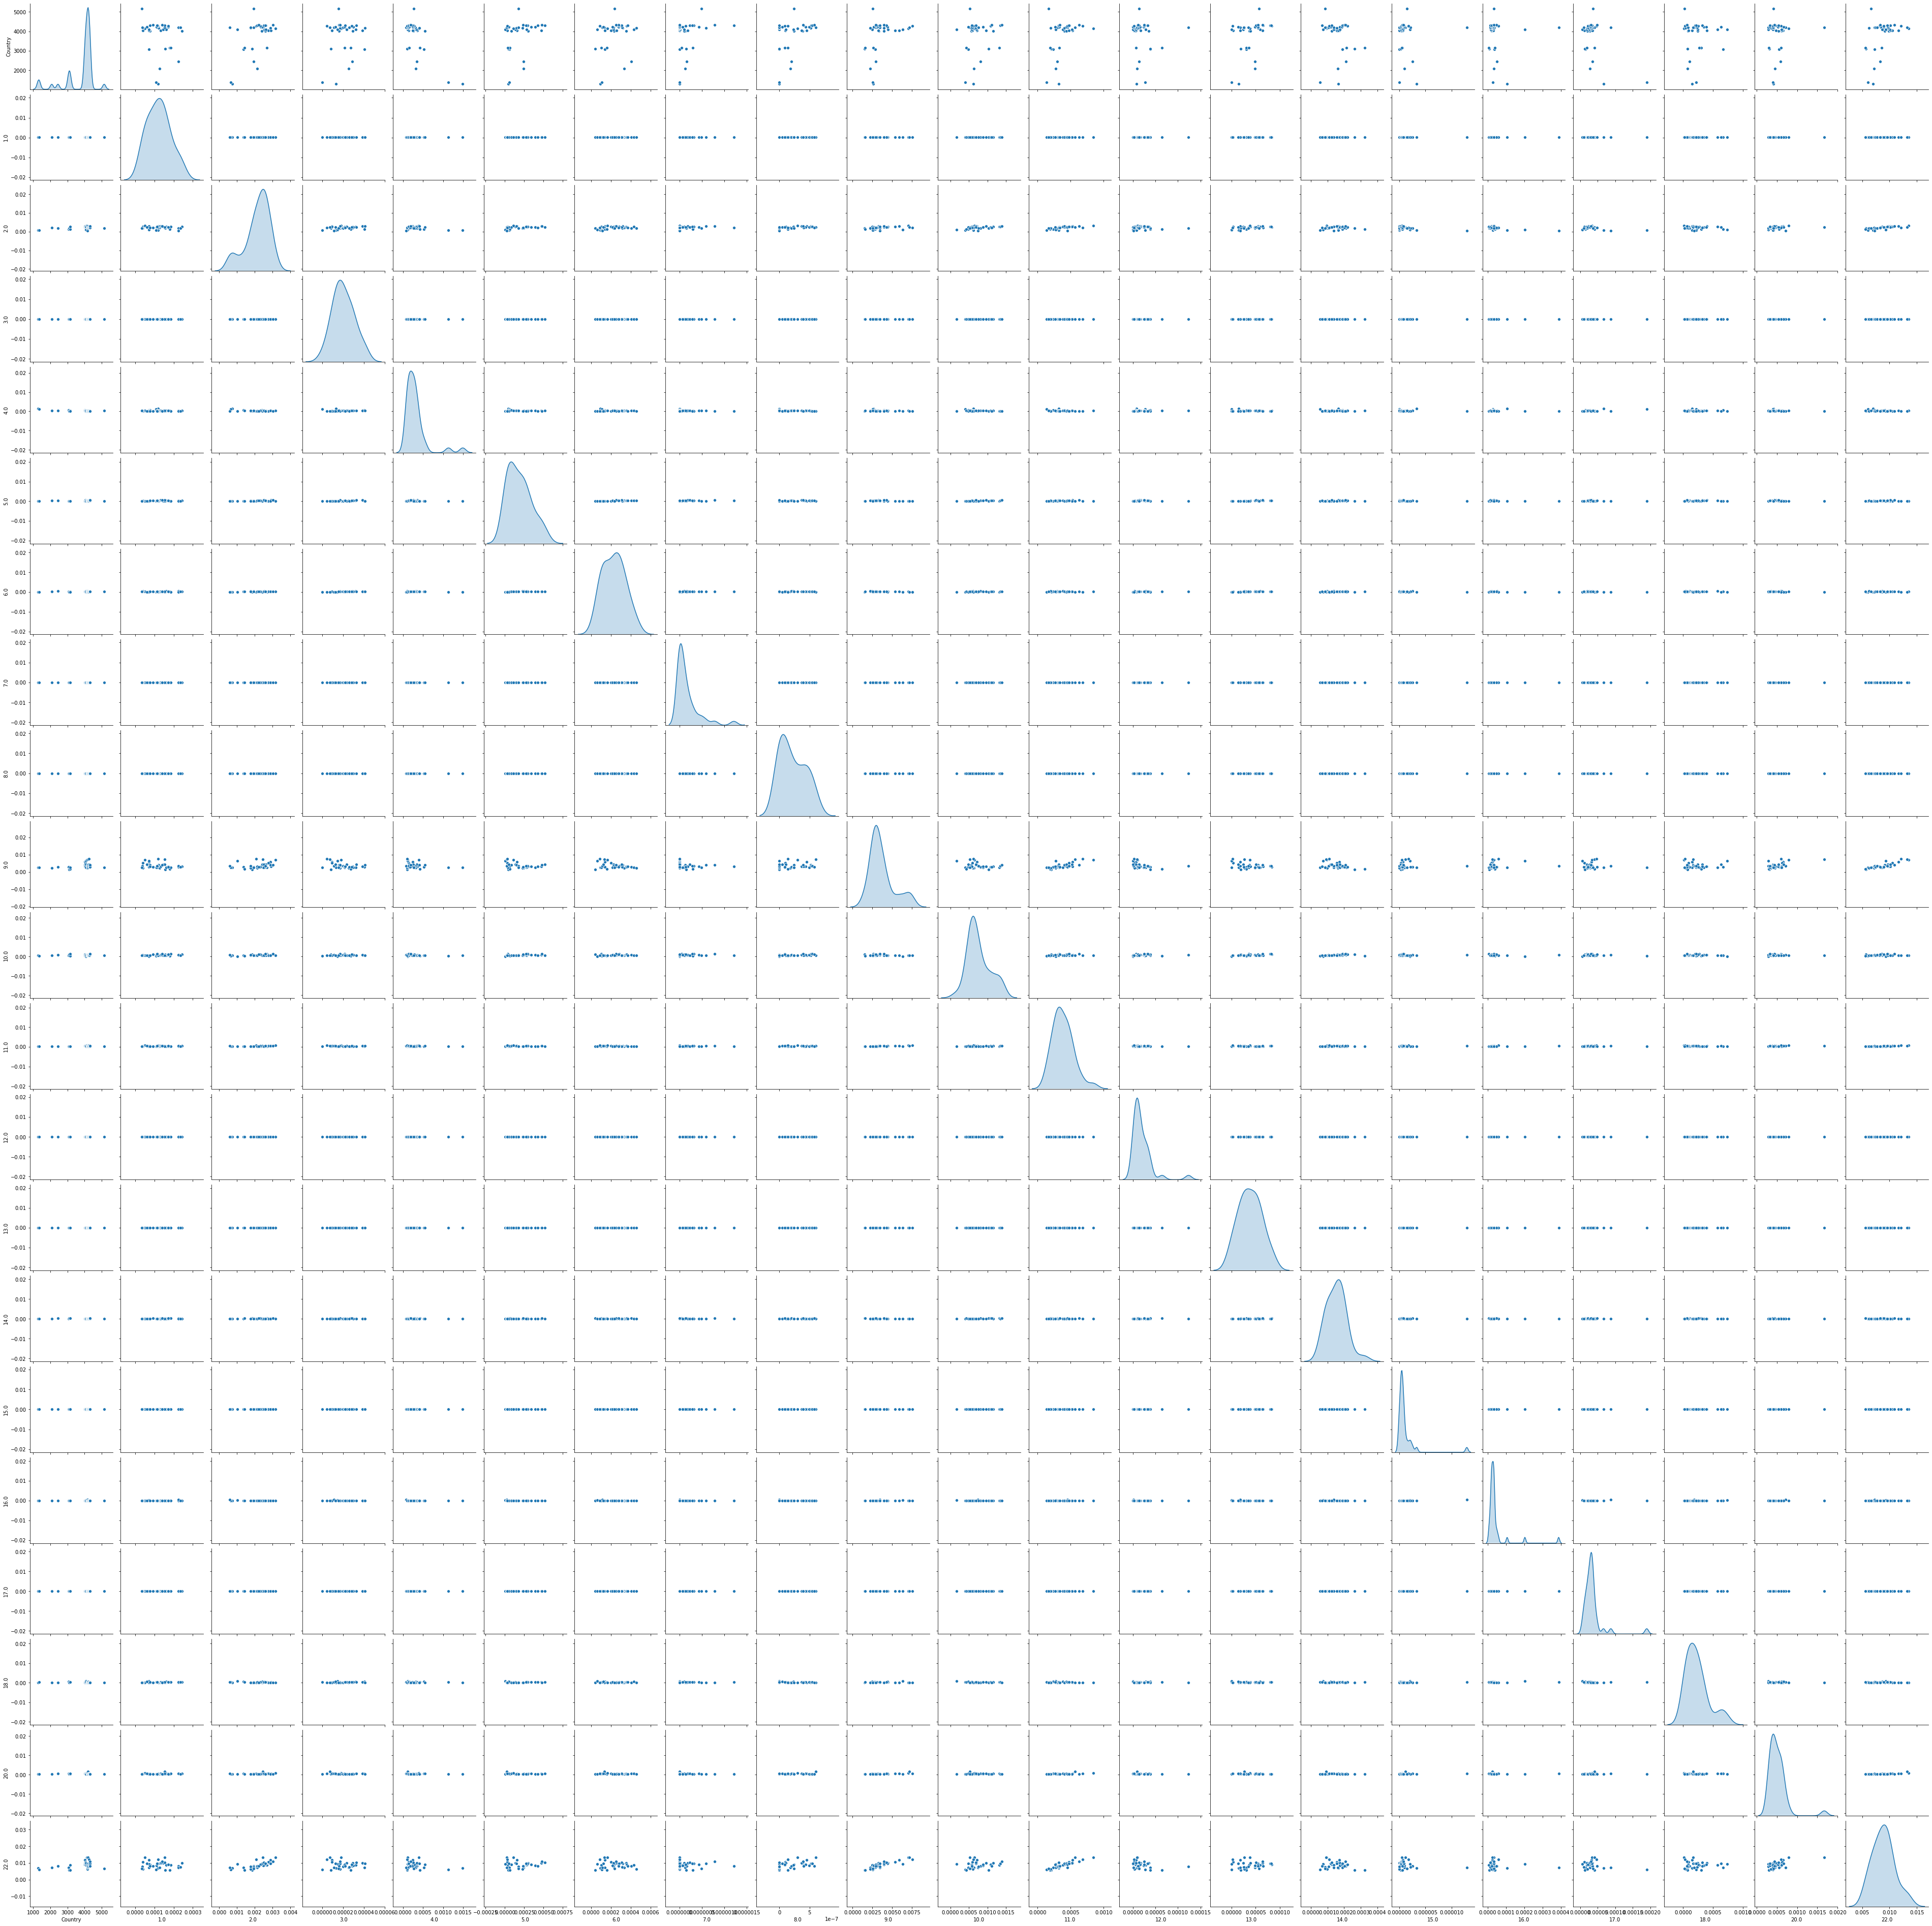

In [115]:
## pairplot of data
sb.pairplot(cube_05, diag_kind='kde');

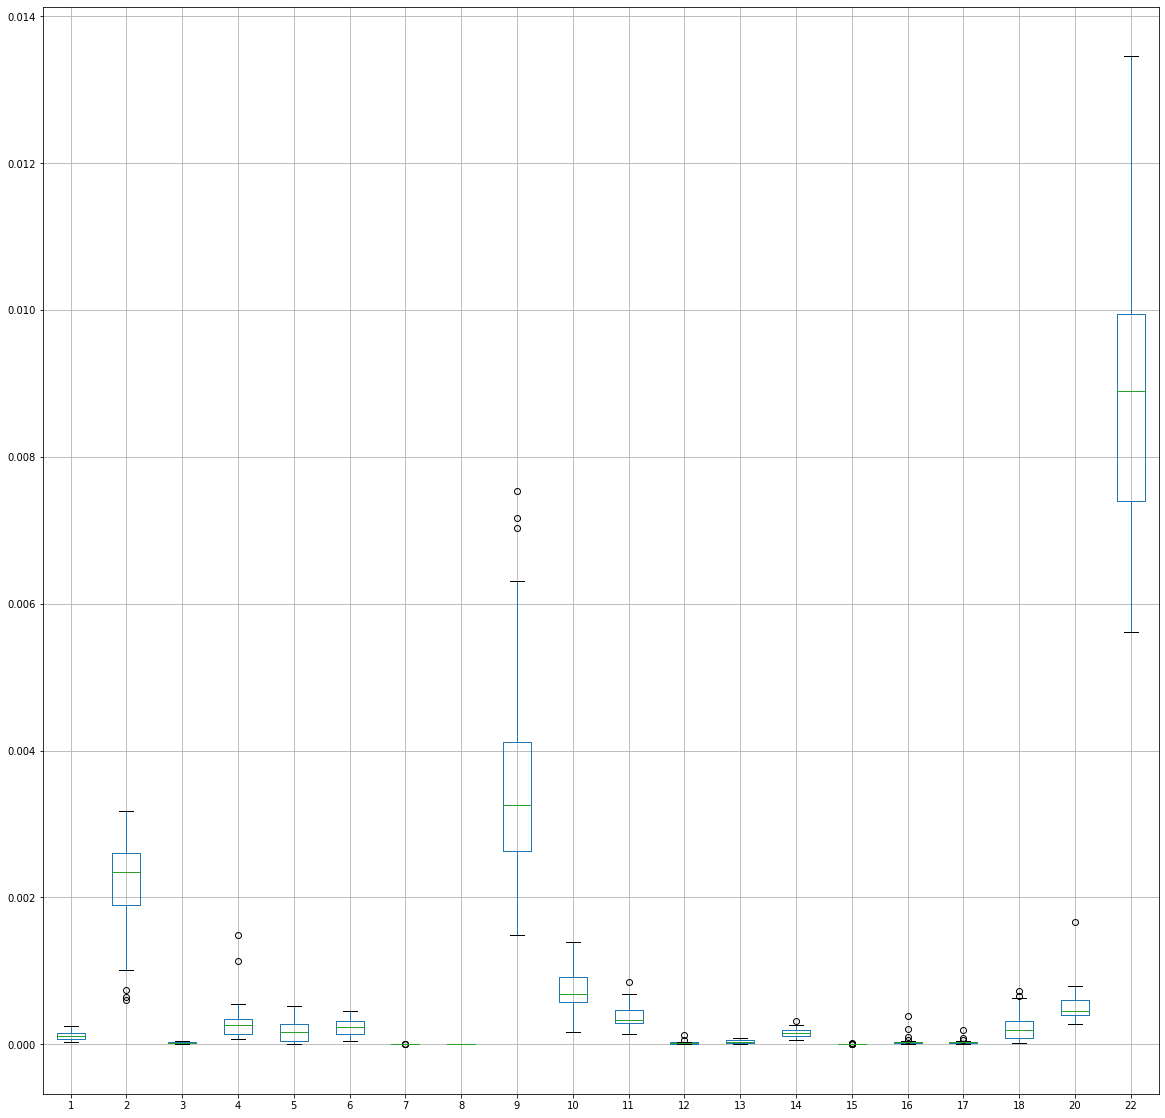

In [116]:
cube_05.boxplot(column =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22],figsize = (20,20))

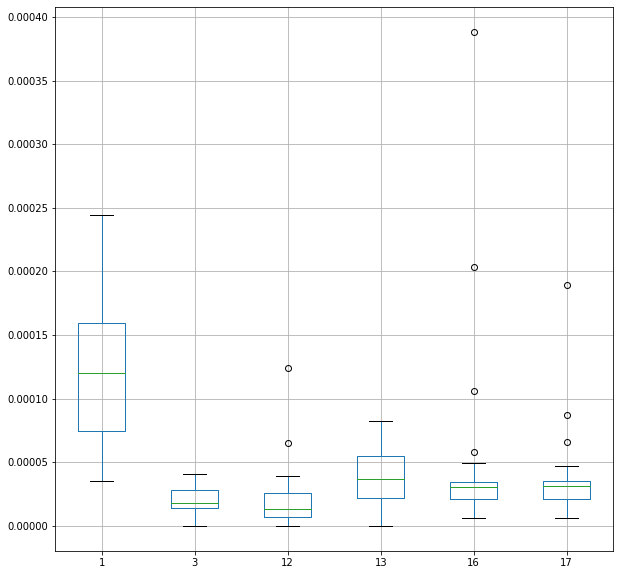

In [117]:
cube_05.boxplot(column =[1,3,12,13,16,17],figsize = (10,10))

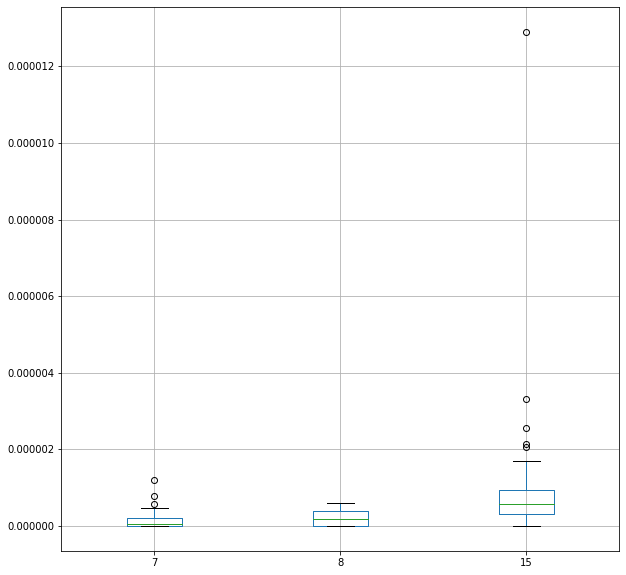

In [119]:
cube_05.boxplot(column =[7,8,15],figsize = (10,10))